In [2]:
pip install csv_reader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rcParams['font.family'] = 'AppleGothic'
from IPython.display import Image 

In [4]:
cust_feature_df_1 = pd.read_csv('customer_feature.csv')
cust_feature_df_1

,Unnamed: 0,cust,male,ages,zon_hlv,most_common_visiting,most_common_store,max_buy_am,most_common_time,Lpay_user,twice_product
0,0,M000034966,0,40,Z07,Z07,A02,65700.0,16,0,10
1,1,M000136117,0,30,Z11,Z14,A01,2612000.0,15,1,15
2,2,M000201112,0,50,Z17,Z10,A04,8000.0,15,0,2
3,3,M000225114,0,40,Z17,Z17,A01,129000.0,18,0,28
4,4,M000261625,0,40,Z17,Z17,A01,1160000.0,18,0,16
...,...,...,...,...,...,...,...,...,...,...,...
26912,26912,M999599111,0,40,Z04,Z04,A02,1158000.0,19,1,6
26913,26913,M999673157,1,30,Z10,Z10,['A01' 'A04'],1673000.0,[ 1 12 19],0,5
26914,26914,M999770689,0,30,Z16,Z16,A04,59000.0,21,1,50
26915,26915,M999849895,0,20,Z04,Z10,A02,269000.0,19,0,10


In [5]:
cust_feature_df_2 = pd.read_csv('feature.csv')
cust_feature_df_2

,Unnamed: 0,cust,user_total_items,total_distinct_items,user_average_basket,weekday_rate,weekend_rate
0,0,M430112881,580,168,5.686275,0.862745,0.137255
1,1,M646853852,407,147,4.195876,0.783505,0.216495
2,8,M669384418,122,62,2.711111,0.755556,0.244444
3,10,M886923095,123,50,1.808824,0.779412,0.220588
4,11,M707991383,385,145,1.645299,0.410256,0.589744
...,...,...,...,...,...,...,...
26912,4381304,M423644302,4,1,4.000000,1.000000,0.000000
26913,4381457,M316481461,1,1,1.000000,1.000000,0.000000
26914,4381508,M765148247,1,1,1.000000,0.000000,1.000000
26915,4381570,M498069014,5,1,5.000000,1.000000,0.000000


In [6]:
feature_df = pd.merge(cust_feature_df_1, cust_feature_df_2, on = 'cust', how = 'left')
feature_df = feature_df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])
feature_df

,cust,male,ages,zon_hlv,most_common_visiting,most_common_store,max_buy_am,most_common_time,Lpay_user,twice_product,user_total_items,total_distinct_items,user_average_basket,weekday_rate,weekend_rate
0,M000034966,0,40,Z07,Z07,A02,65700.0,16,0,10,63,37,5.250000,0.333333,0.666667
1,M000136117,0,30,Z11,Z14,A01,2612000.0,15,1,15,114,59,1.628571,0.771429,0.228571
2,M000201112,0,50,Z17,Z10,A04,8000.0,15,0,2,30,19,6.000000,0.400000,0.600000
3,M000225114,0,40,Z17,Z17,A01,129000.0,18,0,28,182,61,2.333333,0.794872,0.205128
4,M000261625,0,40,Z17,Z17,A01,1160000.0,18,0,16,71,33,1.479167,0.479167,0.520833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,40,Z04,Z04,A02,1158000.0,19,1,6,43,23,5.375000,0.500000,0.500000
26913,M999673157,1,30,Z10,Z10,['A01' 'A04'],1673000.0,[ 1 12 19],0,5,28,13,1.647059,0.588235,0.411765
26914,M999770689,0,30,Z16,Z16,A04,59000.0,21,1,50,385,96,3.155738,0.770492,0.229508
26915,M999849895,0,20,Z04,Z10,A02,269000.0,19,0,10,119,48,3.500000,0.941176,0.058824


## 명목형 데이터 및 시간 데이터 One-hot Encoding 수행

In [7]:
## 최대 구매시간(most_common_time) One-Hot Encoding
most_com_df = feature_df[['cust','most_common_time']]
most_com_df = pd.concat([most_com_df, pd.get_dummies(most_com_df['most_common_time'])], axis = 1)
most_com_df = most_com_df.drop(columns = ['most_common_time'], axis = 1)
most_com_df

,cust,0,1,10,11,12,13,14,15,16,...,[20 22],[20 23],[21 22],[21 23],[22 23],[3 4],[4 5],[6 7],[7 8],[8 9]
0,M000034966,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,M000136117,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M000201112,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,M000225114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M000261625,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26913,M999673157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26914,M999770689,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26915,M999849895,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

most_com_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in most_com_df.columns.values]
most_com_df

,cust,0,1,10,11,12,13,14,15,16,...,_20 22_,_20 23_,_21 22_,_21 23_,_22 23_,_3 4_,_4 5_,_6 7_,_7 8_,_8 9_
0,M000034966,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,M000136117,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,M000201112,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,M000225114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M000261625,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26913,M999673157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26914,M999770689,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26915,M999849895,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
## 고객 거주지(zon_hlv) One-Hot Encoding

zon_hlv_df = feature_df[['cust', 'zon_hlv']]
zon_hlv_df

zon_hlv_df = pd.concat([zon_hlv_df, pd.get_dummies(zon_hlv_df['zon_hlv'])], axis = 1)
zon_hlv_df = zon_hlv_df.drop(columns = ['zon_hlv'], axis = 1)

zon_hlv_df

,cust,Z01,Z02,Z03,Z04,Z05,Z06,Z07,Z08,Z09,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17
0,M000034966,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,M000136117,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,M000201112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,M000225114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,M000261625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26913,M999673157,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26914,M999770689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26915,M999849895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
## 고객 주요 구매지 One-Hot Encoding

com_vis_df = feature_df[['cust', 'most_common_visiting']]

com_vis_df = pd.concat([com_vis_df, pd.get_dummies(com_vis_df['most_common_visiting'])], axis = 1)
com_vis_df = com_vis_df.drop(columns = ['most_common_visiting'], axis = 1)
com_vis_df


,cust,Z01,Z02,Z03,Z04,Z05,Z06,Z07,Z08,Z09,...,['Z12' 'Z14'],['Z12' 'Z15' 'Z17'],['Z12' 'Z17'],['Z13' 'Z17'],['Z14' 'Z16' 'Z17'],['Z14' 'Z16'],['Z14' 'Z17'],['Z15' 'Z17'],['Z16' 'Z17'],[]
0,M000034966,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M000136117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M000201112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M000225114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M000261625,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26913,M999673157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26914,M999770689,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26915,M999849895,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

com_vis_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in com_vis_df.columns.values]

In [12]:
## 고객 주요 구매 상점 One-Hot Encoding

com_sto_df = feature_df[['cust', 'most_common_store']]

com_sto_df = pd.concat([com_sto_df, pd.get_dummies(com_sto_df['most_common_store'])], axis = 1)
com_sto_df = com_sto_df.drop(columns = ['most_common_store'], axis = 1)
com_sto_df


,cust,A01,A02,A03,A04,A05,A06,['A01' 'A02' 'A03'],['A01' 'A02' 'A04'],['A01' 'A02' 'A06'],...,['A02' 'A04' 'A05'],['A02' 'A04'],['A02' 'A05'],['A02' 'A06'],['A03' 'A04'],['A03' 'A05'],['A03' 'A06'],['A04' 'A05'],['A04' 'A06'],['A05' 'A06']
0,M000034966,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M000136117,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M000201112,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M000225114,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M000261625,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26913,M999673157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26914,M999770689,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26915,M999849895,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

com_sto_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in com_sto_df.columns.values]

## Target 데이터 불러오기

In [14]:
target_df = pd.read_csv('labeling_result.csv')
target_df['class'] = target_df['class'] - 1
target_df

,Unnamed: 0,cust,monetary,recency,frequency,R,F,M,cluster,RFM_score,class
0,0,M000034966,654120.0,9.0,12.0,4,1,1,0.0,50.766930,2
1,2,M000136117,27373630.0,2.0,70.0,4,2,2,0.0,67.177954,0
2,3,M000201112,53120.0,34.0,5.0,4,1,1,0.0,50.766930,2
3,4,M000225114,1937700.0,1.0,78.0,4,2,1,0.0,59.213159,1
4,5,M000261625,6052700.0,28.0,48.0,4,1,1,0.0,50.766930,2
...,...,...,...,...,...,...,...,...,...,...,...
26912,29906,M999599111,1484022.0,48.0,8.0,3,1,1,NaN,42.177954,3
26913,29907,M999673157,2851370.0,14.0,17.0,4,1,1,NaN,50.766930,2
26914,29909,M999770689,1187140.0,1.0,122.0,4,2,1,NaN,59.213159,1
26915,29910,M999849895,1103792.0,31.0,34.0,4,1,1,NaN,50.766930,2


In [15]:
summary_df = pd.read_csv('labeling_summary.csv')
summary_df

,class,cust_count,contribution
0,1,2392,0.473621
1,2,5791,0.256257
2,3,11074,0.198712
3,4,7660,0.071410


## 훈련 집합 및 테스트 집합 분할

In [16]:
from sklearn.model_selection import train_test_split

x = feature_df[['male','ages','max_buy_am','Lpay_user','twice_product','user_total_items','total_distinct_items','user_average_basket','weekday_rate','weekend_rate']]
y = target_df['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, shuffle = True)

In [17]:
X_train

,male,ages,max_buy_am,Lpay_user,twice_product,user_total_items,total_distinct_items,user_average_basket,weekday_rate,weekend_rate
23170,1,50,199000.0,0,10,52,22,1.485714,0.685714,0.314286
17328,1,50,17880.0,0,3,31,17,31.000000,1.000000,0.000000
10511,1,20,76800.0,0,0,1,1,1.000000,0.000000,1.000000
25198,0,60,67900.0,0,54,449,82,14.031250,0.437500,0.562500
17960,1,50,9000.0,0,1,14,5,2.333333,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...
21575,1,40,285000.0,1,7,41,23,10.250000,0.250000,0.750000
5390,0,30,56000.0,0,34,229,85,3.053333,0.640000,0.360000
860,1,50,41000.0,0,38,234,73,2.888889,0.555556,0.444444
15795,0,50,306600.0,0,2,65,14,5.416667,0.750000,0.250000


# XGBoost

## 모델에 투입할 중요 Feature 추출

In [18]:
import xgboost as xgb


# 모델 선언
model = xgb.XGBClassifier(booster = 'dart', importance_type = 'gain') 

# 모델 훈련
model.fit(X_train, y_train) 

model.feature_importances_

array([0.02957286, 0.03174705, 0.06986555, 0.0443683 , 0.10446814,
       0.44015682, 0.04560674, 0.20060785, 0.03360664, 0.        ],
      dtype=float32)

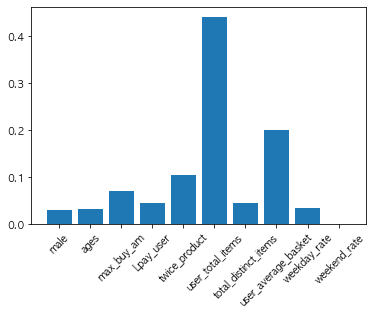

<Figure size 36000x14400 with 0 Axes>

In [19]:
    feat_names = ['male','ages','max_buy_am','Lpay_user','twice_product','user_total_items','total_distinct_items','user_average_basket','weekday_rate','weekend_rate']
point = model.feature_importances_

plt.bar(feat_names, point)
plt.xticks(rotation=45)
plt.figure(figsize=(500,200))

plt.show()

## Feature 선택 

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt

x_feature = feature_df[['male', 'ages', 'cust', 'max_buy_am','Lpay_user','twice_product','user_total_items','total_distinct_items','user_average_basket','weekday_rate']]
x_zon_hlv = zon_hlv_df
x_com_vis_df = com_vis_df
x_most_com_df = most_com_df
x_most_sto_df = com_sto_df


x = pd.merge(x_feature, x_zon_hlv, on = 'cust')
x = pd.merge(x, x_com_vis_df, on = 'cust')
x = pd.merge(x, x_most_com_df, on = 'cust')
x = pd.merge(x, x_most_sto_df, on = 'cust')
x = x.drop(columns = ['cust'], axis = 1)

y = target_df['class']
x

,male,ages,max_buy_am,Lpay_user,twice_product,user_total_items,total_distinct_items,user_average_basket,weekday_rate,Z01_x,...,_'A02' 'A04' 'A05'_,_'A02' 'A04'_,_'A02' 'A05'_,_'A02' 'A06'_,_'A03' 'A04'_,_'A03' 'A05'_,_'A03' 'A06'_,_'A04' 'A05'_,_'A04' 'A06'_,_'A05' 'A06'_
0,0,40,65700.0,0,10,63,37,5.250000,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
1,0,30,2612000.0,1,15,114,59,1.628571,0.771429,0,...,0,0,0,0,0,0,0,0,0,0
2,0,50,8000.0,0,2,30,19,6.000000,0.400000,0,...,0,0,0,0,0,0,0,0,0,0
3,0,40,129000.0,0,28,182,61,2.333333,0.794872,0,...,0,0,0,0,0,0,0,0,0,0
4,0,40,1160000.0,0,16,71,33,1.479167,0.479167,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,0,40,1158000.0,1,6,43,23,5.375000,0.500000,0,...,0,0,0,0,0,0,0,0,0,0
26913,1,30,1673000.0,0,5,28,13,1.647059,0.588235,0,...,0,0,0,0,0,0,0,0,0,0
26914,0,30,59000.0,1,50,385,96,3.155738,0.770492,0,...,0,0,0,0,0,0,0,0,0,0
26915,0,20,269000.0,0,10,119,48,3.500000,0.941176,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, shuffle = True)

In [119]:
import xgboost as xgb


# 모델 선언
model = xgb.XGBClassifier(booster = 'dart', importance_type = 'gain') 

# 모델 훈련
model.fit(X_train, y_train) 

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

model.predict(X_test)

0.8635118190684067
0.7821322436849926


array([2, 2, 1, ..., 3, 3, 3])

# Clustering

In [94]:
clust_df = feature_df
clust_df = pd.merge(clust_df, target_df[['cust', 'class']])
clust_df

,cust,male,ages,zon_hlv,most_common_visiting,most_common_store,max_buy_am,most_common_time,Lpay_user,twice_product,user_total_items,total_distinct_items,user_average_basket,weekday_rate,weekend_rate,class
0,M000034966,0,40,Z07,Z07,A02,65700.0,16,0,10,63,37,5.250000,0.333333,0.666667,2
1,M000136117,0,30,Z11,Z14,A01,2612000.0,15,1,15,114,59,1.628571,0.771429,0.228571,0
2,M000201112,0,50,Z17,Z10,A04,8000.0,15,0,2,30,19,6.000000,0.400000,0.600000,2
3,M000225114,0,40,Z17,Z17,A01,129000.0,18,0,28,182,61,2.333333,0.794872,0.205128,1
4,M000261625,0,40,Z17,Z17,A01,1160000.0,18,0,16,71,33,1.479167,0.479167,0.520833,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,40,Z04,Z04,A02,1158000.0,19,1,6,43,23,5.375000,0.500000,0.500000,3
26913,M999673157,1,30,Z10,Z10,['A01' 'A04'],1673000.0,[ 1 12 19],0,5,28,13,1.647059,0.588235,0.411765,2
26914,M999770689,0,30,Z16,Z16,A04,59000.0,21,1,50,385,96,3.155738,0.770492,0.229508,1
26915,M999849895,0,20,Z04,Z10,A02,269000.0,19,0,10,119,48,3.500000,0.941176,0.058824,2


In [95]:
class_4 = clust_df[clust_df['class'] == 3]
class_3 = clust_df[clust_df['class'] == 2]
class_2 = clust_df[clust_df['class'] == 1]
class_1 = clust_df[clust_df['class'] == 0]

In [96]:
class_4 = class_4[['cust', 'male', 'ages', 'Lpay_user', 'max_buy_am', 'user_total_items', 'user_average_basket', 'most_common_store']]
class_3 = class_3[['cust', 'male', 'ages', 'Lpay_user', 'max_buy_am', 'user_total_items', 'user_average_basket', 'most_common_store']]
class_2 = class_2[['cust', 'male', 'ages', 'Lpay_user', 'max_buy_am', 'user_total_items', 'user_average_basket', 'most_common_store']]
class_1 = class_1[['cust', 'male', 'ages', 'Lpay_user', 'max_buy_am', 'user_total_items', 'user_average_basket', 'most_common_store']]

## 1번 클래스 Cluster 분석

In [97]:
com_sto_1 = class_1[['cust', 'most_common_store']]
com_sto_1 = pd.concat([com_sto_1, pd.get_dummies(com_sto_1['most_common_store'])], axis = 1)
com_sto_1 = com_sto_1.drop(columns = ['cust', 'most_common_store'], axis = 1)
com_sto_1


,A01,A02,A03,A04,A06,['A01' 'A02'],['A01' 'A04']
1,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0
56,0,1,0,0,0,0,0
58,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
26875,0,0,1,0,0,0,0
26879,1,0,0,0,0,0,0
26880,0,0,1,0,0,0,0
26893,0,1,0,0,0,0,0


In [98]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

com_sto_1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in com_sto_1.columns.values]

In [99]:
class_1 = pd.concat([class_1, com_sto_1], axis = 1)
class_1 = class_1.drop(columns = ['cust', 'most_common_store'])
class_1

,male,ages,Lpay_user,max_buy_am,user_total_items,user_average_basket,A01,A02,A03,A04,A06,_'A01' 'A02'_,_'A01' 'A04'_
1,0,30,1,2612000.0,114,1.628571,1,0,0,0,0,0,0
7,0,30,1,2991000.0,547,3.418750,1,0,0,0,0,0,0
12,0,40,0,3030000.0,213,1.554745,1,0,0,0,0,0,0
56,0,20,0,95000.0,469,2.726744,0,1,0,0,0,0,0
58,1,50,1,5270000.0,117,2.250000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26875,0,70,0,20409.0,794,5.712230,0,0,1,0,0,0,0
26879,1,40,1,6680000.0,255,2.056452,1,0,0,0,0,0,0
26880,0,40,1,169000.0,721,4.073446,0,0,1,0,0,0,0
26893,0,50,1,329000.0,425,2.023810,0,1,0,0,0,0,0


/var/folders/mt/h66m2ngd2018sg3lkd5ghq200000gn/T/ipykernel_17472/2805858035.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


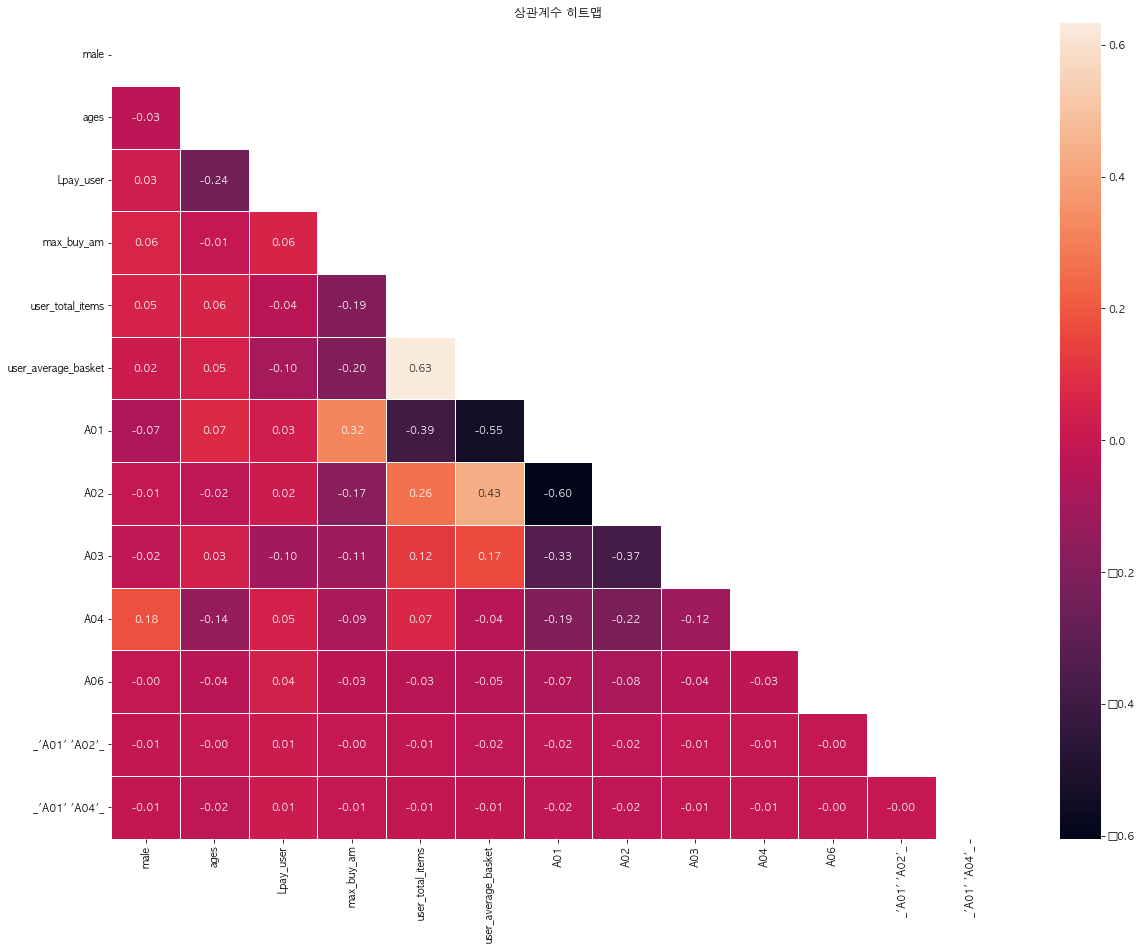

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

corr = class_1.corr()

plt.figure(figsize = (20, 15))

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
          annot = True,
          mask = mask,
          fmt = '.2f',
          linewidths = 1)
plt.title('상관계수 히트맵')
plt.show()

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(class_1)
class_1_pca = pca.transform(class_1)

CPU times: user 26.4 ms, sys: 28.1 ms, total: 54.5 ms
Wall time: 13.6 ms
n_cluster : 1, inertia : 5.7785999818057896e+16
CPU times: user 55.1 ms, sys: 45.6 ms, total: 101 ms
Wall time: 28.3 ms
n_cluster : 2, inertia : 2.428642882748908e+16
CPU times: user 71.7 ms, sys: 56.2 ms, total: 128 ms
Wall time: 43.3 ms
n_cluster : 3, inertia : 1.0269513509591698e+16
CPU times: user 53.7 ms, sys: 43.6 ms, total: 97.3 ms
Wall time: 30.7 ms
n_cluster : 4, inertia : 5830696466820539.0
CPU times: user 69.8 ms, sys: 59.2 ms, total: 129 ms
Wall time: 39.8 ms
n_cluster : 5, inertia : 3909909664653457.5
CPU times: user 56.8 ms, sys: 44.1 ms, total: 101 ms
Wall time: 31 ms
n_cluster : 6, inertia : 2705234577232233.5
CPU times: user 61.9 ms, sys: 47.4 ms, total: 109 ms
Wall time: 35.2 ms
n_cluster : 7, inertia : 1758108312974875.0
CPU times: user 76.3 ms, sys: 61.3 ms, total: 138 ms
Wall time: 44.6 ms
n_cluster : 8, inertia : 1419010835322083.2
CPU times: user 93.4 ms, sys: 76.9 ms, total: 170 ms
Wall tim

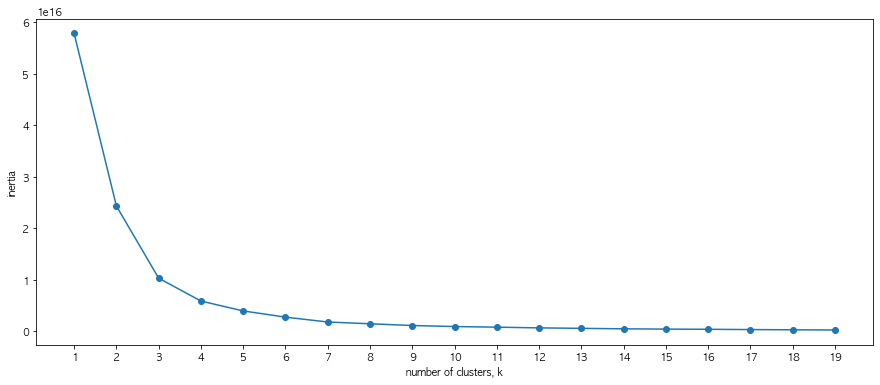

In [102]:
from sklearn.cluster import KMeans

ks = range(1, 20)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k, n_init = 5)
    %time model.fit(class_1_pca)
    inertias.append(model.inertia_)
    print('n_cluster : {}, inertia : {}'.format(k, model.inertia_))
    
plt.figure(figsize = (15, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(class_1_pca)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
class_1['cluster'] = model.fit_predict(class_1_pca)

In [104]:
class_1

,male,ages,Lpay_user,max_buy_am,user_total_items,user_average_basket,A01,A02,A03,A04,A06,_'A01' 'A02'_,_'A01' 'A04'_,cluster
1,0,30,1,2612000.0,114,1.628571,1,0,0,0,0,0,0,0
7,0,30,1,2991000.0,547,3.418750,1,0,0,0,0,0,0,0
12,0,40,0,3030000.0,213,1.554745,1,0,0,0,0,0,0,0
56,0,20,0,95000.0,469,2.726744,0,1,0,0,0,0,0,0
58,1,50,1,5270000.0,117,2.250000,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26875,0,70,0,20409.0,794,5.712230,0,0,1,0,0,0,0,0
26879,1,40,1,6680000.0,255,2.056452,1,0,0,0,0,0,0,1
26880,0,40,1,169000.0,721,4.073446,0,0,1,0,0,0,0,0
26893,0,50,1,329000.0,425,2.023810,0,1,0,0,0,0,0,0


In [105]:
cluster_size = class_1['cluster'].value_counts()
print(cluster_size)

0    1988
1     380
2      24
Name: cluster, dtype: int64


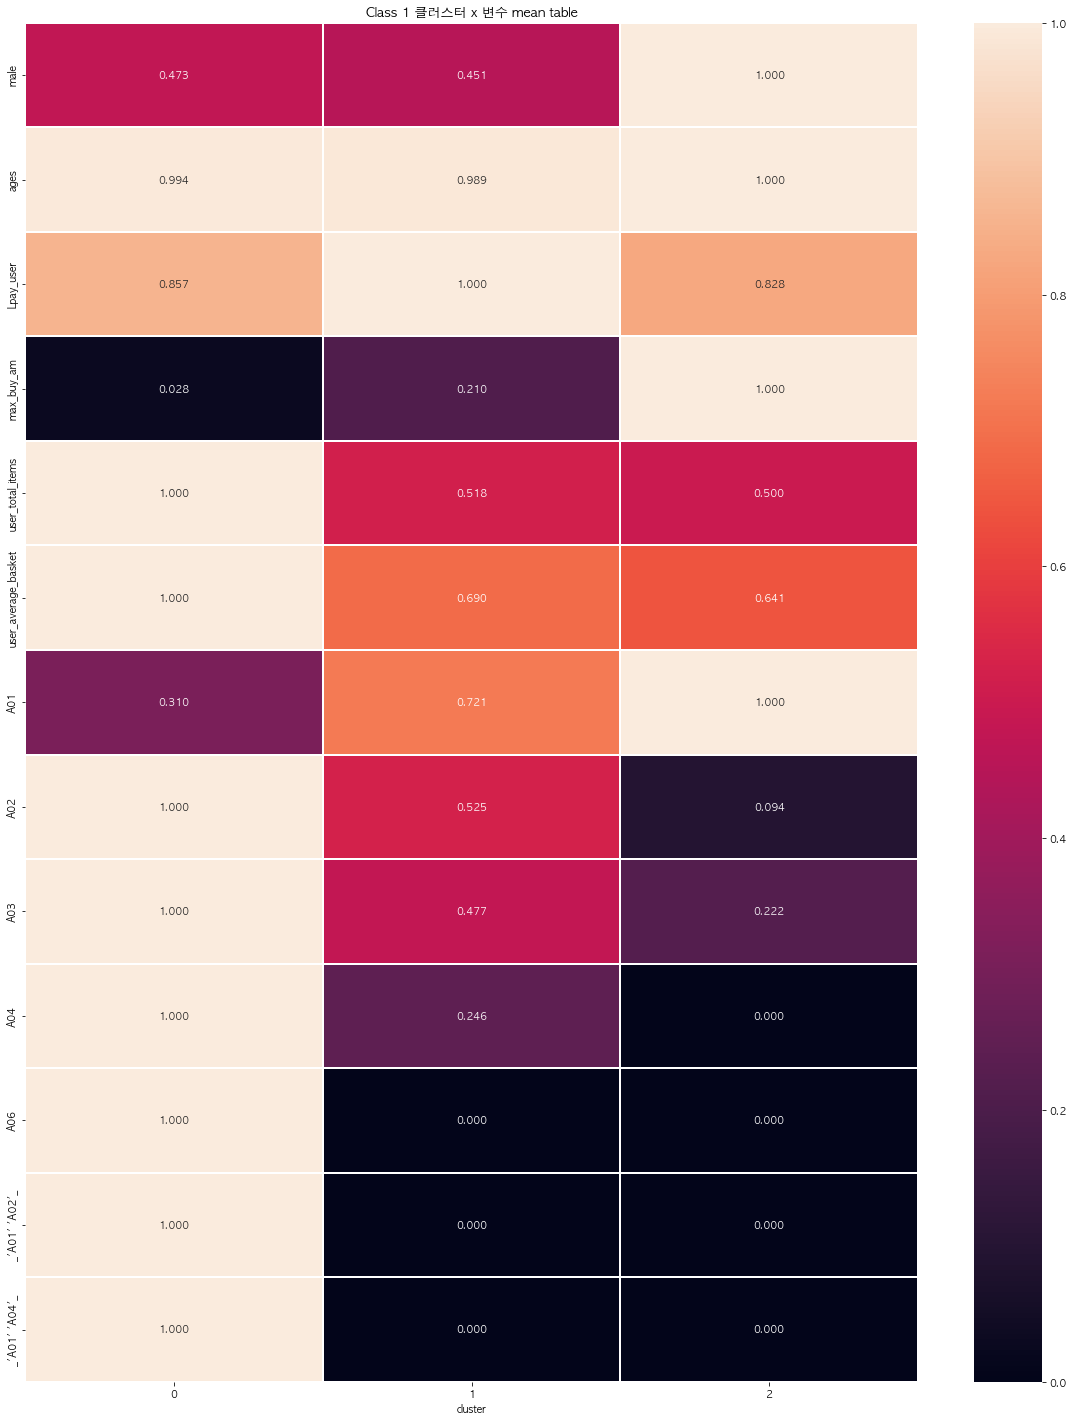

In [106]:
temp = class_1.groupby(['cluster']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis = 1), axis = 0)

plt.figure(figsize = (20, 25))
annow_kws = {'fontsize' : 12}
sns.heatmap(mean_table,
           annot = True,
           fmt = '.3f',
           linewidths = 0.1)
plt.title('Class 1 클러스터 x 변수 mean table', fontsize = 13)
plt.show()

<AxesSubplot:xlabel='user_average_basket', ylabel='cluster'>

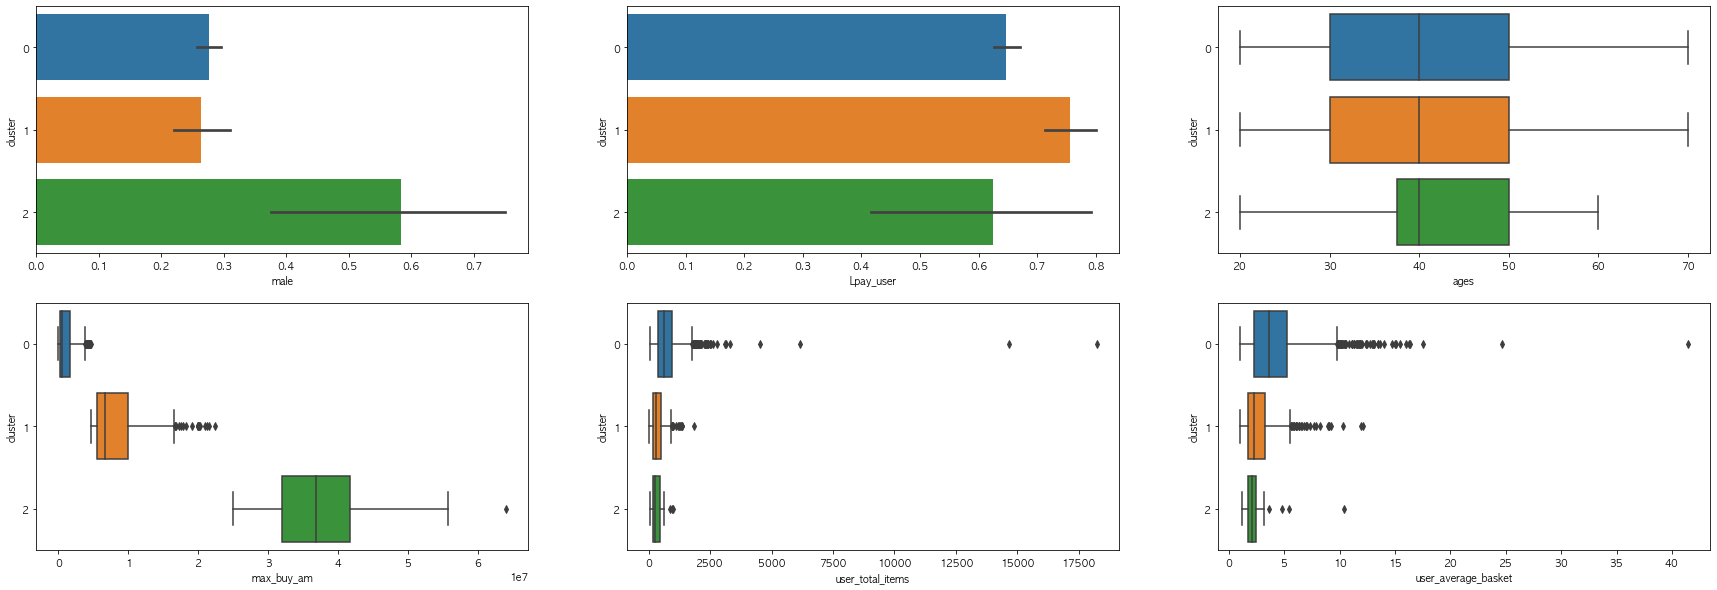

In [107]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(30, 10)

sns.barplot(data = class_1, y = 'cluster', x = 'male', orient = 'h', ax = ax1)
sns.barplot(data = class_1, y = 'cluster', x = 'Lpay_user', orient = 'h', ax = ax2)
sns.boxplot(data = class_1, y = 'cluster', x = 'ages', orient = 'h', ax = ax3)
sns.boxplot(data = class_1, y = 'cluster', x = 'max_buy_am', orient = 'h', ax = ax4)
sns.boxplot(data = class_1, y = 'cluster', x = 'user_total_items', orient = 'h', ax = ax5)
sns.boxplot(data = class_1, y = 'cluster', x = 'user_average_basket', orient = 'h', ax = ax6)


## 2번 클래스 클러스터 분석

In [108]:
class_2

,cust,male,ages,Lpay_user,max_buy_am,user_total_items,user_average_basket,most_common_store
3,M000225114,0,40,0,129000.0,182,2.333333,A01
18,M000871427,0,20,1,359000.0,103,1.943396,A02
22,M001231653,0,60,0,73500.0,252,2.964706,A01
29,M001444118,1,30,1,3850000.0,586,5.051724,A02
40,M001714196,0,40,1,299000.0,333,2.541985,A02
...,...,...,...,...,...,...,...,...
26896,M999048029,0,40,1,151000.0,140,2.500000,A01
26903,M999213998,0,40,0,120000.0,818,14.350877,A02
26905,M999238704,1,30,0,280000.0,324,4.984615,A02
26914,M999770689,0,30,1,59000.0,385,3.155738,A04


In [109]:
com_sto_2 = class_2[['cust', 'most_common_store']]
com_sto_2 = pd.concat([com_sto_2, pd.get_dummies(com_sto_2['most_common_store'])], axis = 1)
com_sto_2 = com_sto_2.drop(columns = ['most_common_store'], axis = 1)
com_sto_2


,cust,A01,A02,A03,A04,A05,A06,['A01' 'A02' 'A04'],['A01' 'A02'],['A01' 'A03'],['A01' 'A04'],['A01' 'A06'],['A02' 'A03'],['A02' 'A04']
3,M000225114,1,0,0,0,0,0,0,0,0,0,0,0,0
18,M000871427,0,1,0,0,0,0,0,0,0,0,0,0,0
22,M001231653,1,0,0,0,0,0,0,0,0,0,0,0,0
29,M001444118,0,1,0,0,0,0,0,0,0,0,0,0,0
40,M001714196,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26896,M999048029,1,0,0,0,0,0,0,0,0,0,0,0,0
26903,M999213998,0,1,0,0,0,0,0,0,0,0,0,0,0
26905,M999238704,0,1,0,0,0,0,0,0,0,0,0,0,0
26914,M999770689,0,0,0,1,0,0,0,0,0,0,0,0,0


In [110]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

com_sto_2.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in com_sto_2.columns.values]

In [111]:
class_2 = pd.concat([class_2, com_sto_2], axis = 1)
class_2 = class_2.drop(columns = ['cust', 'most_common_store'])
class_2

,male,ages,Lpay_user,max_buy_am,user_total_items,user_average_basket,A01,A02,A03,A04,A05,A06,_'A01' 'A02' 'A04'_,_'A01' 'A02'_,_'A01' 'A03'_,_'A01' 'A04'_,_'A01' 'A06'_,_'A02' 'A03'_,_'A02' 'A04'_
3,0,40,0,129000.0,182,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0
18,0,20,1,359000.0,103,1.943396,0,1,0,0,0,0,0,0,0,0,0,0,0
22,0,60,0,73500.0,252,2.964706,1,0,0,0,0,0,0,0,0,0,0,0,0
29,1,30,1,3850000.0,586,5.051724,0,1,0,0,0,0,0,0,0,0,0,0,0
40,0,40,1,299000.0,333,2.541985,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26896,0,40,1,151000.0,140,2.500000,1,0,0,0,0,0,0,0,0,0,0,0,0
26903,0,40,0,120000.0,818,14.350877,0,1,0,0,0,0,0,0,0,0,0,0,0
26905,1,30,0,280000.0,324,4.984615,0,1,0,0,0,0,0,0,0,0,0,0,0
26914,0,30,1,59000.0,385,3.155738,0,0,0,1,0,0,0,0,0,0,0,0,0


/var/folders/mt/h66m2ngd2018sg3lkd5ghq200000gn/T/ipykernel_17472/380064881.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


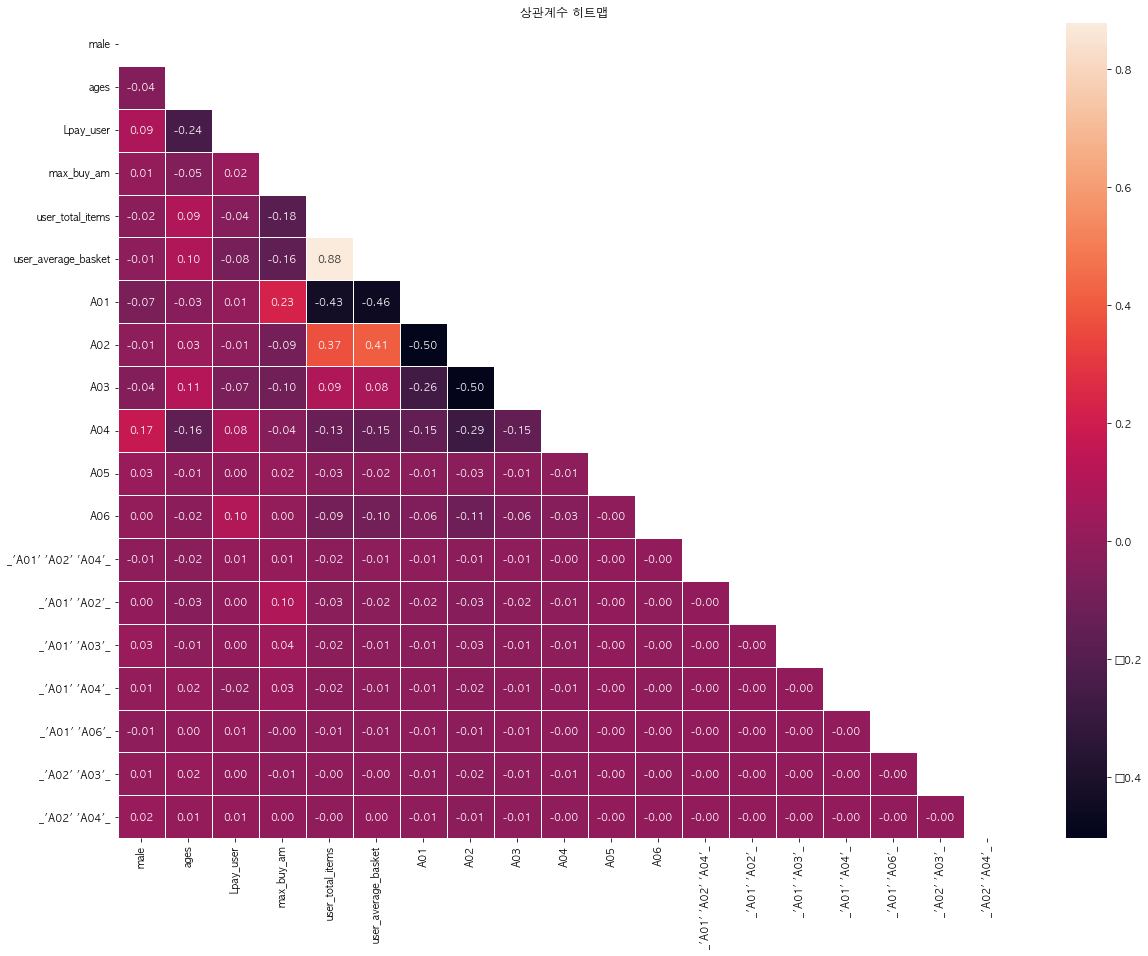

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

corr = class_2.corr()

plt.figure(figsize = (20, 15))

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,
          annot = True,
          mask = mask,
          fmt = '.2f',
          linewidths = 1)
plt.title('상관계수 히트맵')
plt.show()

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(class_2)
class_2_pca = pca.transform(class_2)

CPU times: user 30.5 ms, sys: 24.4 ms, total: 54.9 ms
Wall time: 17.7 ms
n_cluster : 1, inertia : 1.3097221151910964e+16
CPU times: user 92.6 ms, sys: 67.6 ms, total: 160 ms
Wall time: 55.6 ms
n_cluster : 2, inertia : 5888090143699243.0
CPU times: user 87 ms, sys: 64 ms, total: 151 ms
Wall time: 45.5 ms
n_cluster : 3, inertia : 2983987712307352.5
CPU times: user 119 ms, sys: 86.8 ms, total: 206 ms
Wall time: 61.6 ms
n_cluster : 4, inertia : 1620139659256565.5
CPU times: user 139 ms, sys: 103 ms, total: 242 ms
Wall time: 70.3 ms
n_cluster : 5, inertia : 1054683133656384.9
CPU times: user 180 ms, sys: 120 ms, total: 301 ms
Wall time: 87.4 ms
n_cluster : 6, inertia : 712732523858356.1
CPU times: user 165 ms, sys: 120 ms, total: 284 ms
Wall time: 78.9 ms
n_cluster : 7, inertia : 529213207248645.7
CPU times: user 173 ms, sys: 119 ms, total: 292 ms
Wall time: 91.3 ms
n_cluster : 8, inertia : 380643888295182.5
CPU times: user 137 ms, sys: 98 ms, total: 235 ms
Wall time: 71 ms
n_cluster : 9, i

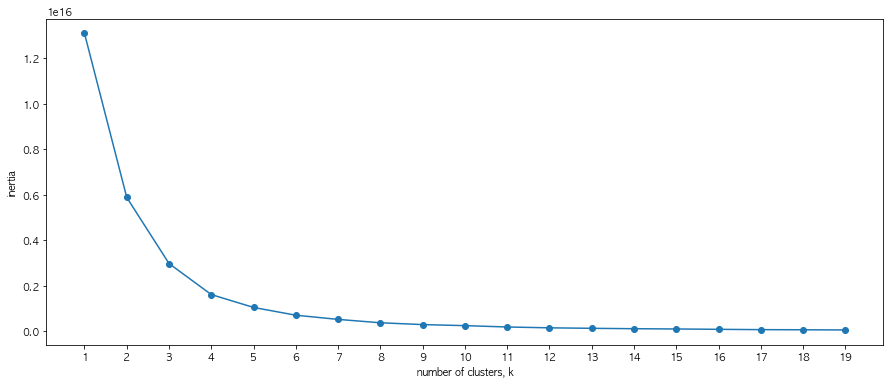

In [114]:
from sklearn.cluster import KMeans

ks = range(1, 20)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k, n_init = 5)
    %time model.fit(class_2_pca)
    inertias.append(model.inertia_)
    print('n_cluster : {}, inertia : {}'.format(k, model.inertia_))
    
plt.figure(figsize = (15, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(class_1_pca)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
class_2['cluster'] = model.fit_predict(class_2_pca)

In [116]:
cluster_size_2 = class_2['cluster'].value_counts()
print(cluster_size_2)

0    5298
1     460
2      33
Name: cluster, dtype: int64


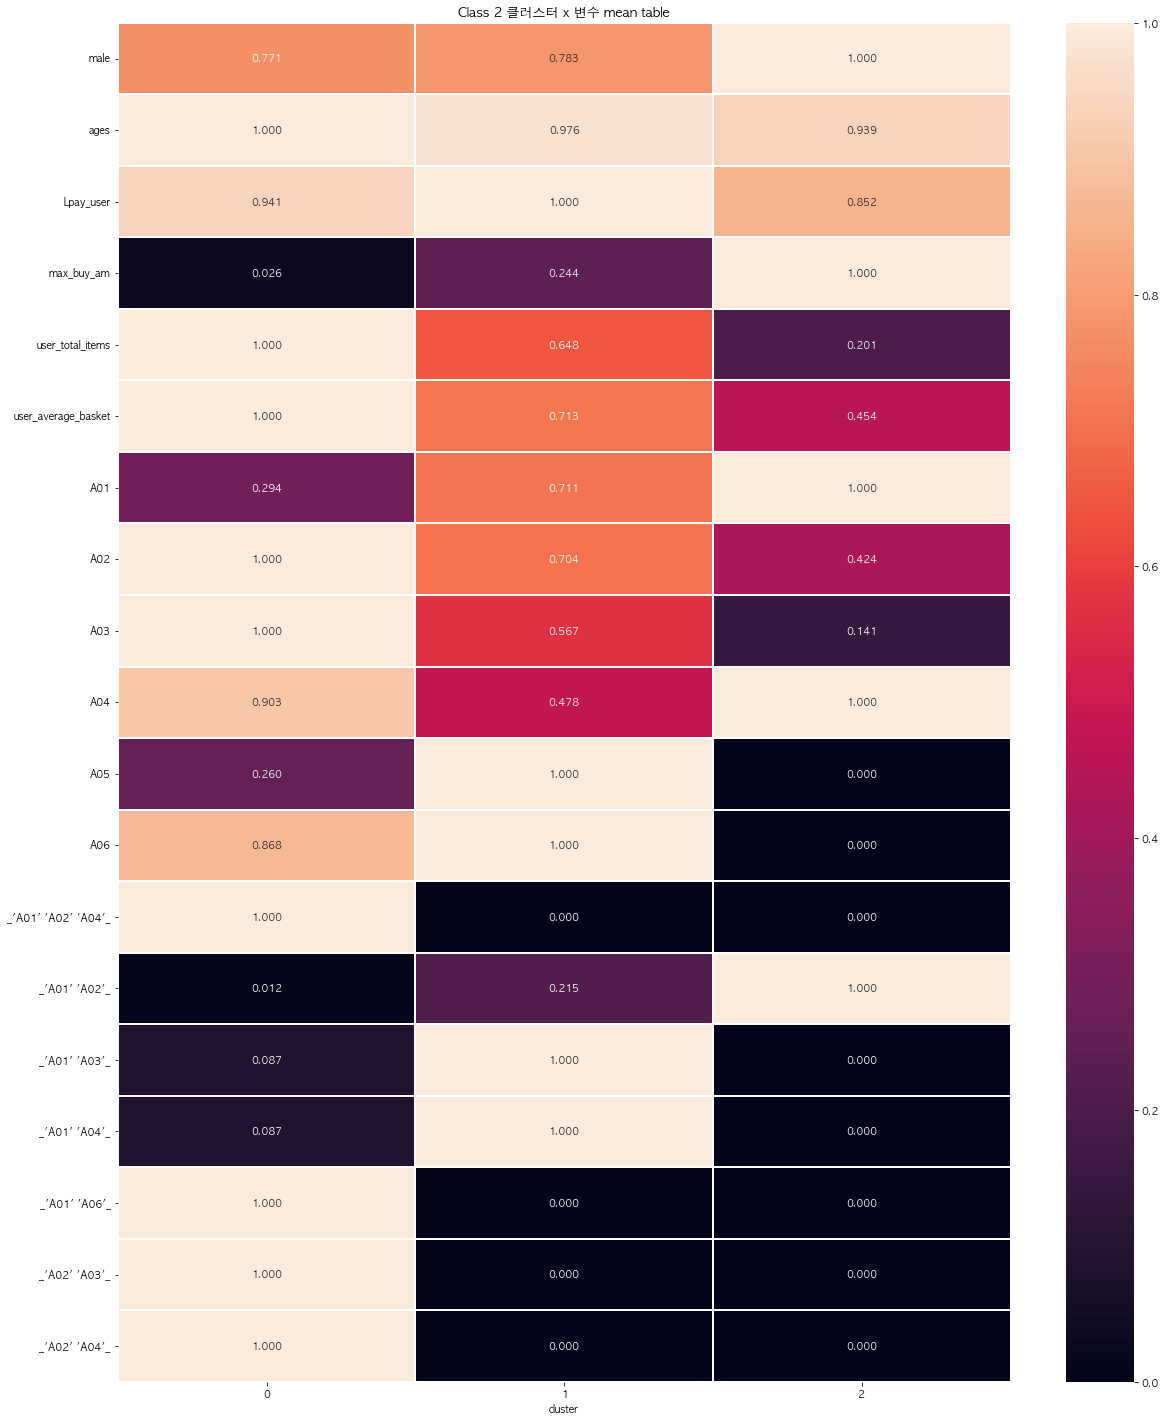

In [117]:
temp = class_2.groupby(['cluster']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis = 1), axis = 0)

plt.figure(figsize = (20, 25))
annow_kws = {'fontsize' : 12}
sns.heatmap(mean_table,
           annot = True,
           fmt = '.3f',
           linewidths = 0.1)
plt.title('Class 2 클러스터 x 변수 mean table', fontsize = 13)
plt.show()

<AxesSubplot:xlabel='user_average_basket', ylabel='cluster'>

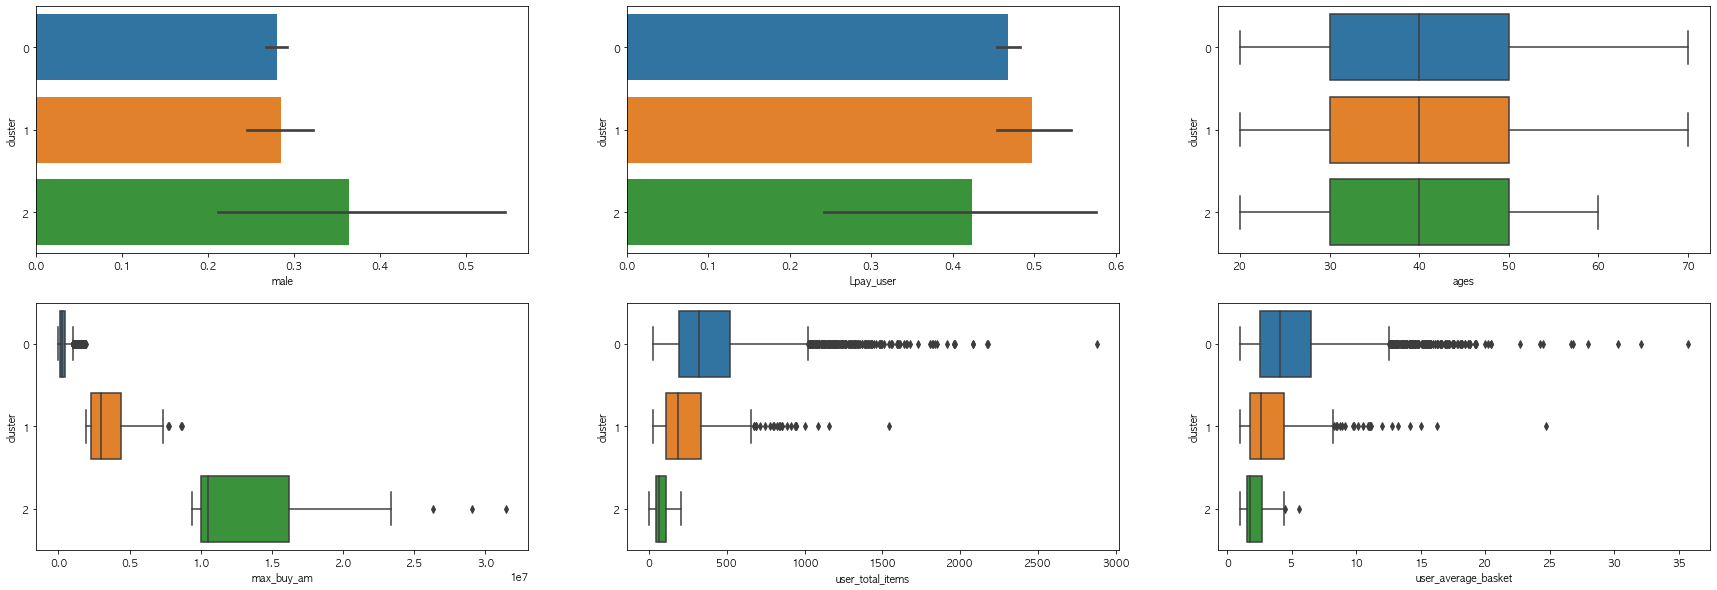

In [118]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(30, 10)

sns.barplot(data = class_2, y = 'cluster', x = 'male', orient = 'h', ax = ax1)
sns.barplot(data = class_2, y = 'cluster', x = 'Lpay_user', orient = 'h', ax = ax2)
sns.boxplot(data = class_2, y = 'cluster', x = 'ages', orient = 'h', ax = ax3)
sns.boxplot(data = class_2, y = 'cluster', x = 'max_buy_am', orient = 'h', ax = ax4)
sns.boxplot(data = class_2, y = 'cluster', x = 'user_total_items', orient = 'h', ax = ax5)
sns.boxplot(data = class_2, y = 'cluster', x = 'user_average_basket', orient = 'h', ax = ax6)